<a href="https://colab.research.google.com/github/ussalbt/deep-learning-with-python/blob/main/DL_Lab2_(Assignment_2_(CNN)_Solution_Image_Classification)_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Lab - 2 (CNN) <br><br>Assignment-2 Solution<br><br>Image Classification with CNN<br><h1>


# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [5]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

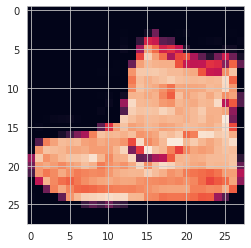

In [8]:
plt.imshow(X_train[0])

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
y_train[0]

9

In [11]:
classes[9]

'Ankle boot'

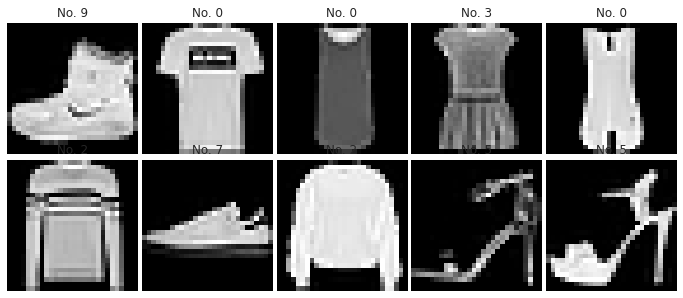

In [12]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title('No. %d' % y_train[image_index])
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [13]:
X_train.min()

0

In [14]:
X_train.max()

255

In [15]:
X_train = X_train/255
X_test = X_test/255

In [16]:
X_train.min()

0.0

In [17]:
X_train.max()

1.0

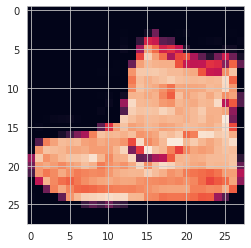

In [18]:
plt.imshow(X_train[0])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [21]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [23]:
from tensorflow.keras.utils import to_categorical#onehot encoding yapıyoruz

In [24]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [25]:
y_train.shape

(60000,)

In [26]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [27]:
y_train[8]

5

In [28]:
Y_train[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create The Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (3,3) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [31]:
model = Sequential()
model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))#mecburi


model.compile(loss='categorical_crossentropy',#mecburi
              optimizer='rmsprop',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1211648   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                      

In [ ]:
((3* 3 * 1) + 1) * 28

280

## Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [35]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 20s 4ms/step - loss: 0.4096 - accuracy: 0.8565 - val_loss: 0.3203 - val_accuracy: 0.8869
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3021 - accuracy: 0.8950 - val_loss: 0.3066 - val_accuracy: 0.8920
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2837 - accuracy: 0.9012 - val_loss: 0.2992 - val_accuracy: 0.8956
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2772 - accuracy: 0.9032 - val_loss: 0.3134 - val_accuracy: 0.8956
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2745 - accuracy: 0.9046 - val_loss: 0.3014 - val_accuracy: 0.8959
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2713 - accuracy: 0.9063 - val_loss: 0.3104 - val_accuracy: 0.8915


**TASK 7: Plot values of metrics you used in your model.**

In [36]:
model.metrics_names

['loss', 'accuracy']

In [37]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.410,0.856,0.320,0.887
1,0.302,0.895,0.307,0.892
2,0.284,0.901,0.299,0.896
3,0.277,0.903,0.313,0.896
4,0.274,0.905,0.301,0.896


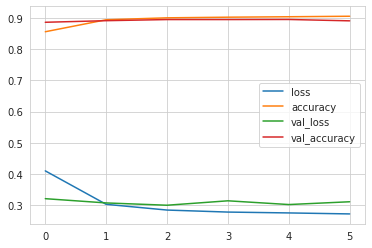

In [38]:
summary.plot();

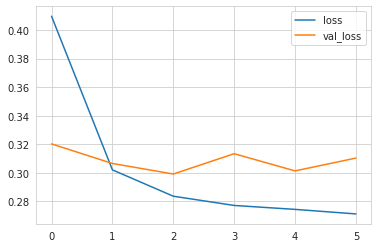

In [39]:
summary[["loss", "val_loss"]].plot();

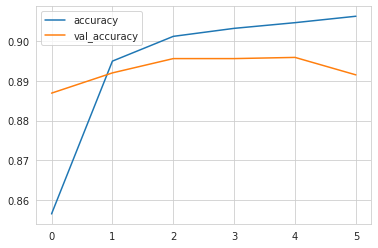

In [40]:
summary[["accuracy", "val_accuracy"]].plot();

In [41]:
model2 = Sequential()
model2.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))
model2.add(MaxPool2D(pool_size=(3, 3),strides=(1, 1)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [42]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 28)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 16128)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               2064512   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [50]:
model2.fit(X_train, Y_train, batch_size=32, epochs=15, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3197 - accuracy: 0.8918 - val_loss: 0.3022 - val_accuracy: 0.8975
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3154 - accuracy: 0.8936 - val_loss: 0.3133 - val_accuracy: 0.8930
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3125 - accuracy: 0.8939 - val_loss: 0.3133 - val_accuracy: 0.8893
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3174 - accuracy: 0.8947 - val_loss: 0.3172 - val_accuracy: 0.8950


In [44]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.468,0.840,0.340,0.878
1,0.334,0.884,0.310,0.893
2,0.315,0.892,0.316,0.894
3,0.312,0.894,0.328,0.885
4,0.312,0.894,0.324,0.888


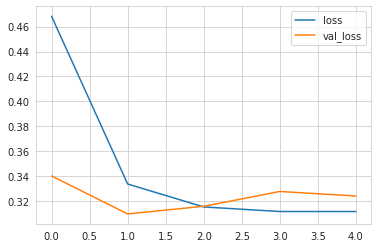

In [45]:
summary[["loss", "val_loss"]].plot();

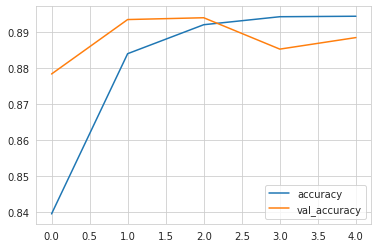

In [46]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2992 - accuracy: 0.8956


[0.2992118299007416, 0.8956000208854675]

In [51]:
model2.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3022 - accuracy: 0.8975


[0.30222973227500916, 0.8974999785423279]

In [52]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.30222973227500916
Test accuracy: 0.8974999785423279


In [53]:
pred_prob = model2.predict(X_test)
pred_prob

array([[1.2840949e-06, 8.4439842e-09, 4.8223433e-06, ..., 2.9762005e-04,
        7.0443501e-05, 9.9916863e-01],
       [1.7012853e-07, 1.0360509e-18, 9.9999833e-01, ..., 2.5234485e-16,
        2.8599727e-11, 2.0997747e-17],
       [3.3541428e-10, 1.0000000e+00, 2.0853352e-12, ..., 2.6584472e-13,
        8.0731515e-13, 6.8203966e-16],
       ...,
       [3.7836294e-09, 4.3637481e-15, 1.5746543e-09, ..., 8.5365361e-12,
        9.9999988e-01, 2.0126907e-11],
       [1.5115797e-08, 9.9999702e-01, 4.6478074e-10, ..., 3.6767625e-09,
        1.4148547e-09, 1.3027636e-10],
       [4.8277937e-02, 3.8399771e-03, 3.4814686e-02, ..., 1.4425227e-01,
        9.7807609e-02, 5.9366506e-02]], dtype=float32)

In [54]:
pred_prob.shape

(10000, 10)

In [55]:
pred_prob[0]

array([1.2840949e-06, 8.4439842e-09, 4.8223433e-06, 1.0576505e-06,
       1.4689332e-06, 4.4865973e-04, 6.1077039e-06, 2.9762005e-04,
       7.0443501e-05, 9.9916863e-01], dtype=float32)

In [56]:
np.argmax(pred_prob[0])

9

In [57]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [58]:
y_pred.shape

(10000,)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.86      0.82      0.84      1000
           3       0.89      0.91      0.90      1000
           4       0.78      0.88      0.83      1000
           5       0.97      0.99      0.98      1000
           6       0.73      0.67      0.70      1000
           7       0.96      0.95      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [61]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [60]:
print(confusion_matrix(y_test, y_pred))

[[848   0  13  26   7   3  98   0   5   0]
 [  0 976   0  16   3   0   4   0   1   0]
 [ 13   0 821   8  92   0  66   0   0   0]
 [ 13   6   9 907  33   0  31   0   1   0]
 [  2   1  42  28 882   0  45   0   0   0]
 [  0   0   0   0   0 988   0   9   0   3]
 [117   3  74  27 102   0 668   0   9   0]
 [  0   0   0   0   0  19   0 947   1  33]
 [  3   2   0   3   5   3   7   3 973   1]
 [  0   0   0   0   0   8   2  25   0 965]]


In [62]:
(y_test != y_pred).sum()

1025

## Prediction

In [72]:
samples=[X_test[6], X_test[12], X_test[15]]

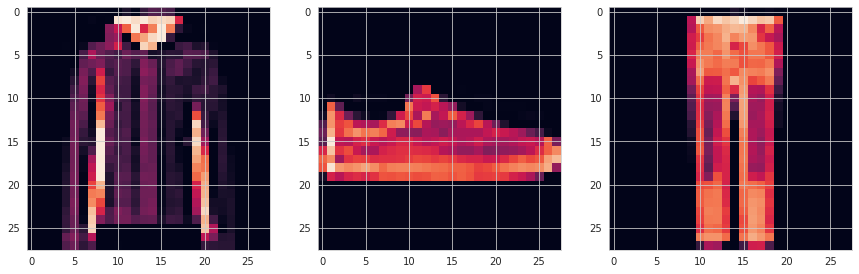

In [73]:
plt.figure(figsize = (20,5))
index=1
for i in samples:
    plt.subplot(1,4,index)
    plt.imshow(i.reshape(28,28))
    index += 1

In [75]:
samples = np.array(samples)
samples

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [76]:
samples.shape

(3, 28, 28, 1)

In [77]:
pred_prob = model2.predict(samples)
pred_prob

array([[5.60585477e-06, 5.67066047e-11, 2.71411706e-02, 3.44328583e-07,
        9.64303911e-01, 1.99026993e-11, 8.54886137e-03, 8.00129413e-14,
        7.38041663e-08, 6.92793175e-12],
       [7.09238346e-04, 1.55281953e-07, 3.56849254e-04, 1.59464922e-04,
        4.25120106e-06, 6.54287934e-02, 1.56911963e-04, 6.25553727e-02,
        8.70269597e-01, 3.59375146e-04],
       [3.85227713e-06, 9.99861002e-01, 2.18444356e-07, 4.69209408e-05,
        8.18845801e-05, 1.00828395e-07, 5.56941450e-06, 2.37364361e-07,
        1.62425735e-07, 1.73669665e-08]], dtype=float32)

In [78]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([4, 8, 1])

In [79]:
y_test[6:20:6]

array([4, 7, 8], dtype=uint8)

In [80]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [81]:
for i in y_test[6:20:6]:
    print(classes[i])

Coat
Sneaker
Bag


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___